#### Importing Libraries

In [49]:
# Libraries for handling the DataFrame and the values
import numpy as np, pandas as pd
import seaborn as sns, plotly.express as px
import matplotlib.pyplot as plt

# Warnings if occurs
import warnings
warnings.filterwarnings('ignore')

#### Reading DataSets

In [52]:
# DataSet contains details as the refernce.
goal_df = pd.read_csv('goalscorers.csv')
result_df = pd.read_csv('results.csv')
Shoot_df = pd.read_csv('shootouts.csv')

In [53]:
display(goal_df.info())
print(50*'-')
display(result_df.info())
print(50*'-')
display(Shoot_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44362 entries, 0 to 44361
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44362 non-null  object 
 1   home_team  44362 non-null  object 
 2   away_team  44362 non-null  object 
 3   team       44362 non-null  object 
 4   scorer     44313 non-null  object 
 5   minute     44103 non-null  float64
 6   own_goal   44362 non-null  bool   
 7   penalty    44362 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.1+ MB


None

--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47598 entries, 0 to 47597
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        47598 non-null  object
 1   home_team   47598 non-null  object
 2   away_team   47598 non-null  object
 3   home_score  47598 non-null  int64 
 4   away_score  47598 non-null  int64 
 5   tournament  47598 non-null  object
 6   city        47598 non-null  object
 7   country     47598 non-null  object
 8   neutral     47598 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 3.0+ MB


None

--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           645 non-null    object
 1   home_team      645 non-null    object
 2   away_team      645 non-null    object
 3   winner         645 non-null    object
 4   first_shooter  230 non-null    object
dtypes: object(5)
memory usage: 25.3+ KB


None

In [54]:
def generate_null_analysis(df):
    count = df.isnull().sum()
    percen = count / len(df) * 100
    
    df_null = pd.DataFrame({
        'column name': df.columns,
        'total count': count,
        'percentage': percen
    })
    
    df_null.reset_index(drop = True, inplace = True)
    df_null_sorted = df_null.sort_values(by = 'percentage', ascending = False)
    df_filtered = df_null_sorted[df_null_sorted['percentage'] > 0]
    df_filtered.reset_index(drop = True, inplace = True)
    
    return df_filtered

def style_null_analysis(df):
    return df.style.background_gradient(cmap = 'YlOrRd', subset = ['percentage', 'total count'])

In [55]:
display(style_null_analysis(generate_null_analysis(goal_df)))
print(50*'_')
display(style_null_analysis(generate_null_analysis(result_df)))
print(50*'_')
display(style_null_analysis(generate_null_analysis(Shoot_df)))

,column name,total count,percentage
0,minute,259,0.583833
1,scorer,49,0.110455


__________________________________________________


,column name,total count,percentage


__________________________________________________


,column name,total count,percentage
0,first_shooter,415,64.341085


In [56]:
print(f"The Rows Dataset contains : {goal_df.shape[0]}\nThe Columns dataset contains : {goal_df.shape[1]}")
print(30*'-')
print(f"The Rows Dataset contains : {result_df.shape[0]}\nThe Columns dataset contains : {result_df.shape[1]}")
print(30*'-')
print(f"The Rows Dataset contains : {Shoot_df.shape[0]}\nThe Columns dataset contains : {Shoot_df.shape[1]}")

The Rows Dataset contains : 44362
The Columns dataset contains : 8
------------------------------
The Rows Dataset contains : 47598
The Columns dataset contains : 9
------------------------------
The Rows Dataset contains : 645
The Columns dataset contains : 5


In [57]:
# Having a Look in the Columns for next suggestion and answer.
print(goal_df.columns)
print("-"*100)
print(result_df.columns)
print("-"*100)
print(Shoot_df.columns)

Index(['date', 'home_team', 'away_team', 'team', 'scorer', 'minute',
       'own_goal', 'penalty'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Index(['date', 'home_team', 'away_team', 'winner', 'first_shooter'], dtype='object')


In [58]:
display(goal_df.head(2))
print("-"*100)
display(result_df.head(2))
print("-"*100)
display(Shoot_df.head(2))

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False


----------------------------------------------------------------------------------------------------


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False


----------------------------------------------------------------------------------------------------


,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN


> **The History of International Football**
> 
> This dataset contains over 44,000 results from international men's football matches (1872–2022). It includes competitions like the FIFA World Cup and friendly matches.
> 
> The data is divided into:
> - **results**: match details with date, teams, scores, tournament, venue, etc.
> - **shootouts**: penalty shootout results, with winner info.
> 
> **Variables in `goals`:**
> - `date`, `home_team`, `away_team`, `team`, `scorer`, `minute`, `own_goal`, `penalty`
> 
> **Variables in `results`:**
> - `date`, `home_team`, `away_team`, `home_score`, `away_score`, `tournament`, `city`, `country`, `neutral`
> 
> **Variables in `shootouts`:**
> - `date`, `home_team`, `away_team`, `winner`, `firesult_dft_shooter`
> 
> *Let me know if you'd like to explore this data further!*

In [59]:
goal_df.select_dtypes(include='object').describe()

,date,home_team,away_team,team,scorer
count,44362,44362,44362,44362,44313
unique,4632,220,220,220,14335
top,2011-10-11,Brazil,Uruguay,Brazil,Cristiano Ronaldo
freq,145,1023,787,1051,108


In [60]:
goal_df['date'] = pd.to_datetime(goal_df['date'])
goal_df['year'] = goal_df['date'].dt.year

In [61]:
goal_df.date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 44362 entries, 0 to 44361
Series name: date
Non-Null Count  Dtype         
--------------  -----         
44362 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 346.7 KB


In [62]:
goal_df['team'].value_counts(ascending=False).reset_index()

,team,count
0,Brazil,1051
1,Germany,974
2,Argentina,948
3,Spain,894
4,Mexico,852
...,...,...
215,Eritrea,4
216,Somalia,3
217,Anguilla,2
218,South Sudan,2


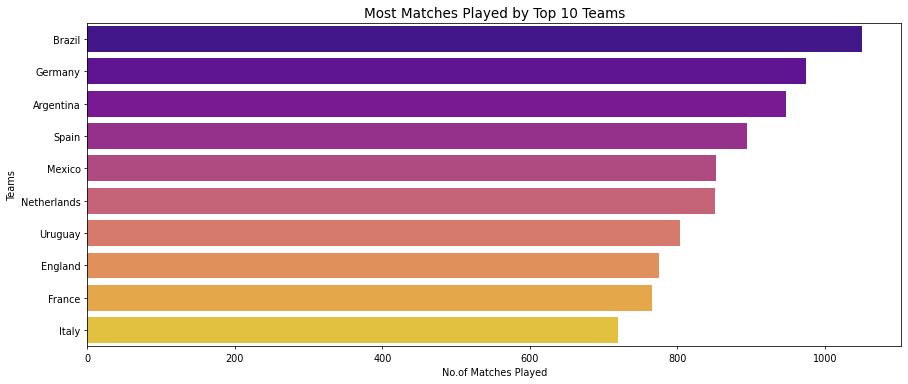

In [64]:
match_played = goal_df['team'].value_counts(ascending=False).head(10)
plt.figure(figsize=(15, 6), dpi=70)
sns.barplot(x=match_played.values, y=match_played.index, palette='plasma')
    
plt.title('Most Matches Played by Top 10 Teams', fontsize=14)
plt.xlabel('No.of Matches Played')
plt.ylabel('Teams')
plt.show()

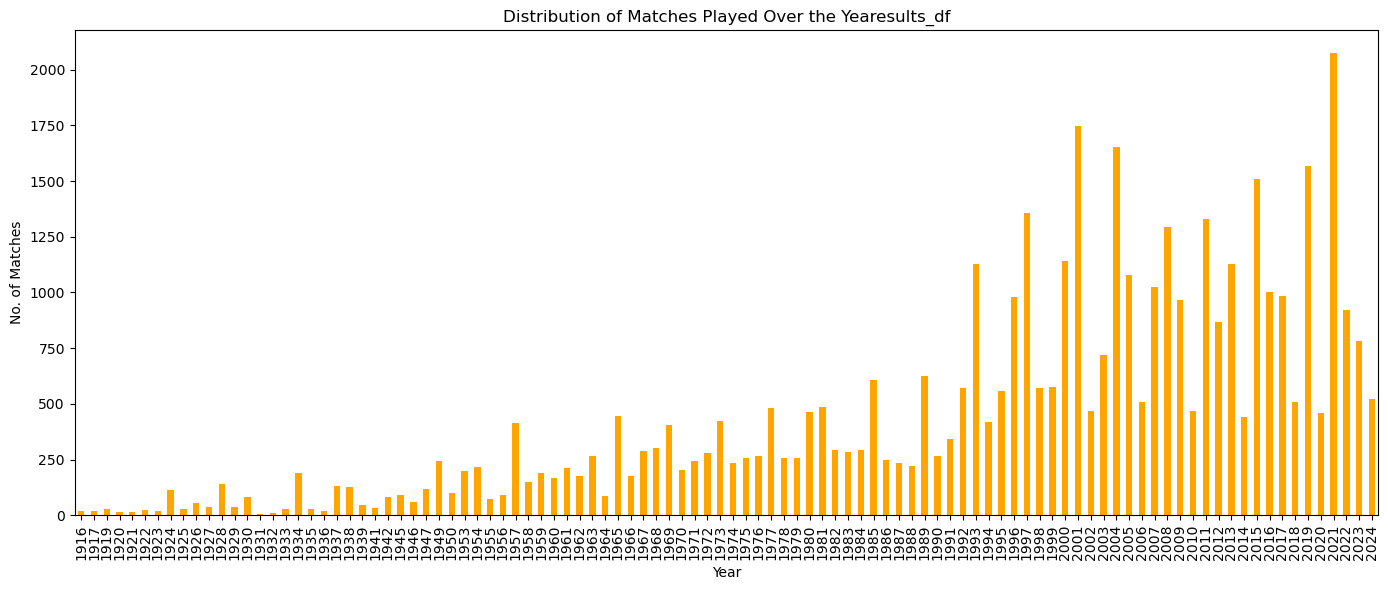

In [65]:
matches_by_year = goal_df.groupby('year').size()
plt.figure(figsize=(14, 6))
matches_by_year.plot(kind='bar', color='orange')
plt.title('Distribution of Matches Played Over the Yearesult_df')
plt.xlabel('Year')
plt.ylabel('No. of Matches')
plt.tight_layout()
plt.show()

In [66]:
goal_df['own_goal'].value_counts()

own_goal
False    43541
True       821
Name: count, dtype: int64

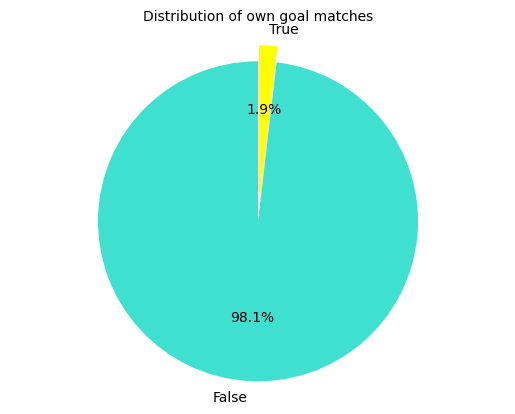

In [69]:
goals = goal_df['own_goal'].value_counts()
plt.pie(goals.values, labels= goals.index, autopct='%1.1f%%', startangle=90, explode=[0, 0.1], colors=['turquoise', 'yellow'])
plt.title('Distribution of own goal matches', size=10)
plt.axis('equal')
plt.show()

In [70]:
goal_df['scorer'].value_counts(ascending=False).reset_index()

,scorer,count
0,Cristiano Ronaldo,108
1,Robert Lewandowski,63
2,Romelu Lukaku,60
3,Harry Kane,58
4,Lionel Messi,55
...,...,...
14330,Ramón Quevedo,1
14331,Oļegs Blagonadeždins,1
14332,José Ramos Delgado,1
14333,Nerijus Barasa,1


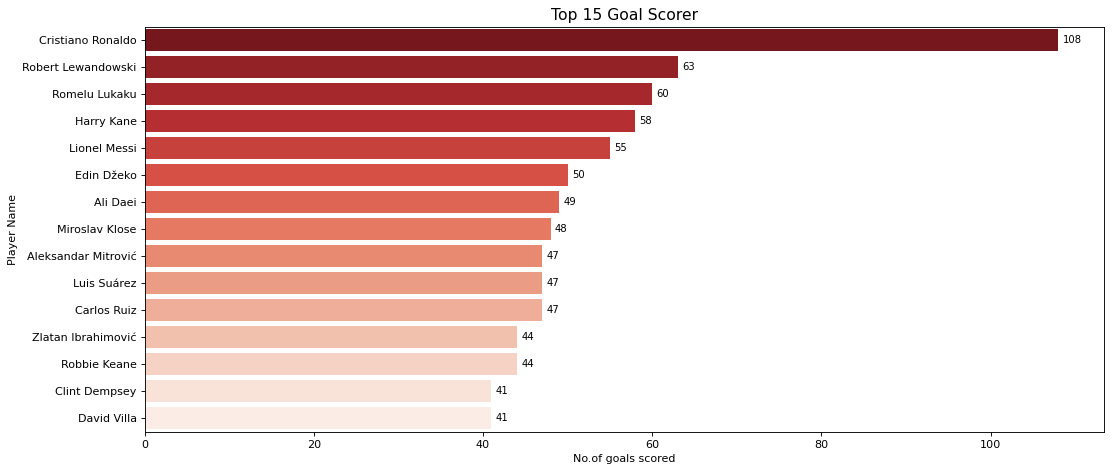

In [71]:
top_goal_df = goal_df['scorer'].value_counts(ascending=False).head(15)
plt.figure(figsize=(14,6), dpi=80)
sns.barplot(x=top_goal_df.values, y=top_goal_df.index, palette='Reds_r')

for i, v in enumerate(top_goal_df.values):
    plt.text(x=v+0.5, y=i, s=str(v), fontsize=9, color='black', va='center')
    
plt.title('Top 15 Goal Scorer', fontsize=14)
plt.xlabel('No.of goals scored')
plt.ylabel('Player Name')
plt.tight_layout()
plt.show()

# What is the frequency of penalty goals in matches?

In [72]:
goal_df['penalty'].value_counts().reset_index()

,penalty,count
0,False,41400
1,True,2962


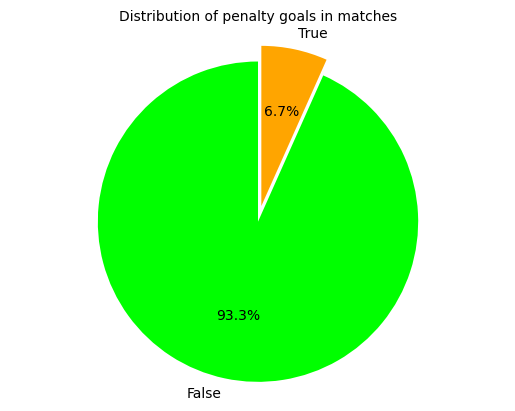

In [73]:
pen = goal_df['penalty'].value_counts()
plt.pie(pen.values, labels= pen.index, autopct='%1.1f%%', startangle=90, explode=[0, 0.1], colors=['lime', 'orange'])
plt.title('Distribution of penalty goals in matches', size=10)
plt.axis('equal')
plt.show()


In [74]:
goal_df.groupby('scorer')['penalty'].sum().sort_values(ascending=False).reset_index()

,scorer,penalty
0,Harry Kane,20
1,Cristiano Ronaldo,19
2,Lionel Messi,14
3,Robert Lewandowski,13
4,Hristo Stoichkov,13
...,...,...
14330,Hamzah Idris Falatah,0
14331,Han Bong-Zin,0
14332,Han Hyong-Il,0
14333,Han Kwang-song,0


In [75]:
goal_df

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,year
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False,1916
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False,1916
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False,1916
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False,1916
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False,1916
...,...,...,...,...,...,...,...,...,...
44357,2024-07-13,Canada,Uruguay,Uruguay,Luis Suárez,90.0,False,False,2024
44358,2024-07-14,Argentina,Colombia,Argentina,Lautaro Martínez,112.0,False,False,2024
44359,2024-07-14,Spain,England,Spain,Nico Williams,47.0,False,False,2024
44360,2024-07-14,Spain,England,England,Cole Palmer,73.0,False,False,2024


# Analysis of results.csv

In [77]:
result_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
47593,2024-09-10,Kuwait,Iraq,0,0,FIFA World Cup qualification,Kuwait City,Kuwait,False
47594,2024-09-10,Palestine,Jordan,1,3,FIFA World Cup qualification,Kuala Lumpur,Malaysia,True
47595,2024-09-10,Bahrain,Japan,0,5,FIFA World Cup qualification,Riffa,Bahrain,False
47596,2024-09-10,Indonesia,Australia,0,0,FIFA World Cup qualification,Jakarta,Indonesia,False


In [79]:
result_df.select_dtypes(include='object').describe()

,date,home_team,away_team,tournament,city,country
count,47598,47598,47598,47598,47598,47598
unique,16214,327,321,176,2072,270
top,2012-02-29,Brazil,Uruguay,Friendly,Kuala Lumpur,United States
freq,66,603,573,18009,730,1405


In [80]:
result_df.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

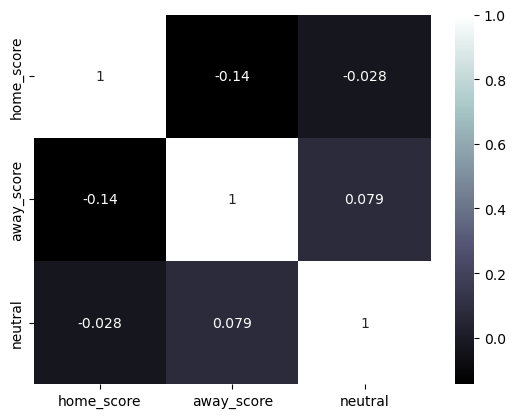

In [81]:
sns.heatmap(result_df.corr(numeric_only=True),annot=True, cmap='bone')
plt.show()

In [82]:
result_df['date'] = pd.to_datetime(result_df['date'])
result_df['year'] = result_df['date'].dt.year

In [83]:
inner_join_df = pd.merge(goal_df, result_df, on=['date', 'home_team', 'away_team'], how='inner')
print('Inner Join Result:')
print(inner_join_df.head())

Inner Join Result:
        date  home_team away_team       team            scorer  minute  \
0 1916-07-02      Chile   Uruguay    Uruguay   José Piendibene    44.0   
1 1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    55.0   
2 1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    70.0   
3 1916-07-02      Chile   Uruguay    Uruguay   José Piendibene    75.0   
4 1916-07-06  Argentina     Chile  Argentina     Alberto Ohaco     2.0   

   own_goal  penalty  year_x  home_score  away_score    tournament  \
0     False    False    1916           0           4  Copa América   
1     False    False    1916           0           4  Copa América   
2     False    False    1916           0           4  Copa América   
3     False    False    1916           0           4  Copa América   
4     False    False    1916           6           1  Copa América   

           city    country  neutral  year_y  
0  Buenos Aires  Argentina     True    1916  
1  Buenos Aires  Argent

In [84]:
outer_join_df = pd.merge(goal_df, result_df, on=['date', 'home_team', 'away_team'], how='outer')
print('Outer Join Result:')
print(outer_join_df)

Outer Join Result:
            date                     home_team     away_team team scorer  \
0     1872-11-30                      Scotland       England  NaN    NaN   
1     1873-03-08                       England      Scotland  NaN    NaN   
2     1874-03-07                      Scotland       England  NaN    NaN   
3     1875-03-06                       England      Scotland  NaN    NaN   
4     1876-03-04                      Scotland       England  NaN    NaN   
...          ...                           ...           ...  ...    ...   
77579 2024-09-10                 United States   New Zealand  NaN    NaN   
77580 2024-09-10  United States Virgin Islands      Barbados  NaN    NaN   
77581 2024-09-10                     Venezuela       Uruguay  NaN    NaN   
77582 2024-09-10                       Vietnam      Thailand  NaN    NaN   
77583 2024-09-10                        Zambia  Sierra Leone  NaN    NaN   

       minute own_goal penalty  year_x  home_score  away_score  \
0 

In [85]:
team_name = 'France'
team_goals = inner_join_df[inner_join_df['team']==team_name]
print(f"Filtered Results for {team_name}:")
team_goals

Filtered Results for France:


,date,home_team,away_team,team,scorer,minute,own_goal,penalty,year_x,home_score,away_score,tournament,city,country,neutral,year_y
166,1924-05-27,France,Latvia,France,Édouard Crut,17.0,False,False,1924,7,0,Olympic Games,Paris,France,False,1924
167,1924-05-27,France,Latvia,France,Paul Nicolas,25.0,False,False,1924,7,0,Olympic Games,Paris,France,False,1924
168,1924-05-27,France,Latvia,France,Édouard Crut,28.0,False,False,1924,7,0,Olympic Games,Paris,France,False,1924
169,1924-05-27,France,Latvia,France,Paul Nicolas,50.0,False,False,1924,7,0,Olympic Games,Paris,France,False,1924
170,1924-05-27,France,Latvia,France,Édouard Crut,55.0,False,False,1924,7,0,Olympic Games,Paris,France,False,1924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43834,2023-11-21,Greece,France,France,Youssouf Fofana,74.0,False,False,2023,2,2,UEFA Euro qualification,Athens,Greece,False,2023
44160,2024-06-17,Austria,France,France,Maximilian Wöber,38.0,True,False,2024,0,1,UEFA Euro,Düsseldorf,Germany,True,2024
44244,2024-06-25,France,Poland,France,Kylian Mbappé,56.0,False,True,2024,1,1,UEFA Euro,Dortmund,Germany,True,2024
44315,2024-07-01,France,Belgium,France,Jan Vertonghen,85.0,True,False,2024,1,0,UEFA Euro,Düsseldorf,Germany,True,2024


In [86]:
team_name = 'Portugal'
team_goals = inner_join_df[inner_join_df['team']==team_name]
print(f"Filtered Results for {team_name}:")
team_goals

Filtered Results for Portugal:


,date,home_team,away_team,team,scorer,minute,own_goal,penalty,year_x,home_score,away_score,tournament,city,country,neutral,year_y
375,1928-05-27,Portugal,Chile,Portugal,Vítor Silva,38.0,False,False,1928,4,2,Olympic Games,Amsterdam,Netherlands,True,1928
376,1928-05-27,Portugal,Chile,Portugal,Pepe Soares,40.0,False,False,1928,4,2,Olympic Games,Amsterdam,Netherlands,True,1928
377,1928-05-27,Portugal,Chile,Portugal,Pepe Soares,50.0,False,False,1928,4,2,Olympic Games,Amsterdam,Netherlands,True,1928
378,1928-05-27,Portugal,Chile,Portugal,Valdemar Mota,63.0,False,False,1928,4,2,Olympic Games,Amsterdam,Netherlands,True,1928
411,1928-05-29,Portugal,Yugoslavia,Portugal,Vítor Silva,25.0,False,False,1928,2,1,Olympic Games,Amsterdam,Netherlands,True,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44169,2024-06-18,Portugal,Czech Republic,Portugal,Robin Hranáč,69.0,True,False,2024,2,1,UEFA Euro,Leipzig,Germany,True,2024
44170,2024-06-18,Portugal,Czech Republic,Portugal,Francisco Conceição,90.0,False,False,2024,2,1,UEFA Euro,Leipzig,Germany,True,2024
44225,2024-06-22,Turkey,Portugal,Portugal,Bernardo Silva,21.0,False,False,2024,0,3,UEFA Euro,Dortmund,Germany,True,2024
44226,2024-06-22,Turkey,Portugal,Portugal,Samet Akaydin,28.0,True,False,2024,0,3,UEFA Euro,Dortmund,Germany,True,2024


In [87]:
team_name = 'Argentina'
team_goals = inner_join_df[inner_join_df['team']==team_name]
print(f"Filtered Results for {team_name}:")
team_goals

Filtered Results for Argentina:


,date,home_team,away_team,team,scorer,minute,own_goal,penalty,year_x,home_score,away_score,tournament,city,country,neutral,year_y
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False,1916,6,1,Copa América,Buenos Aires,Argentina,False,1916
6,1916-07-06,Argentina,Chile,Argentina,Juan Domingo Brown,60.0,False,True,1916,6,1,Copa América,Buenos Aires,Argentina,False,1916
7,1916-07-06,Argentina,Chile,Argentina,Juan Domingo Brown,62.0,False,True,1916,6,1,Copa América,Buenos Aires,Argentina,False,1916
8,1916-07-06,Argentina,Chile,Argentina,Alberto Marcovecchio,67.0,False,False,1916,6,1,Copa América,Buenos Aires,Argentina,False,1916
9,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,75.0,False,False,1916,6,1,Copa América,Buenos Aires,Argentina,False,1916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44289,2024-06-29,Argentina,Peru,Argentina,Lautaro Martínez,86.0,False,False,2024,2,0,Copa América,Miami Gardens,United States,True,2024
44328,2024-07-04,Argentina,Ecuador,Argentina,Lisandro Martínez,35.0,False,False,2024,1,1,Copa América,Houston,United States,True,2024
44345,2024-07-09,Argentina,Canada,Argentina,Julián Álvarez,22.0,False,False,2024,2,0,Copa América,East Rutherford,United States,True,2024
44346,2024-07-09,Argentina,Canada,Argentina,Lionel Messi,51.0,False,False,2024,2,0,Copa América,East Rutherford,United States,True,2024


# What are the most common tournaments played in the dataset?

In [88]:
result_df.tournament.value_counts(ascending=False).reset_index()

,tournament,count
0,Friendly,18009
1,FIFA World Cup qualification,8200
2,UEFA Euro qualification,2824
3,African Cup of Nations qualification,2171
4,FIFA World Cup,964
...,...,...
171,ConIFA Challenger Cup,1
172,FIFA 75th Anniversary Cup,1
173,Copa Confraternidad,1
174,TIFOCO Tournament,1


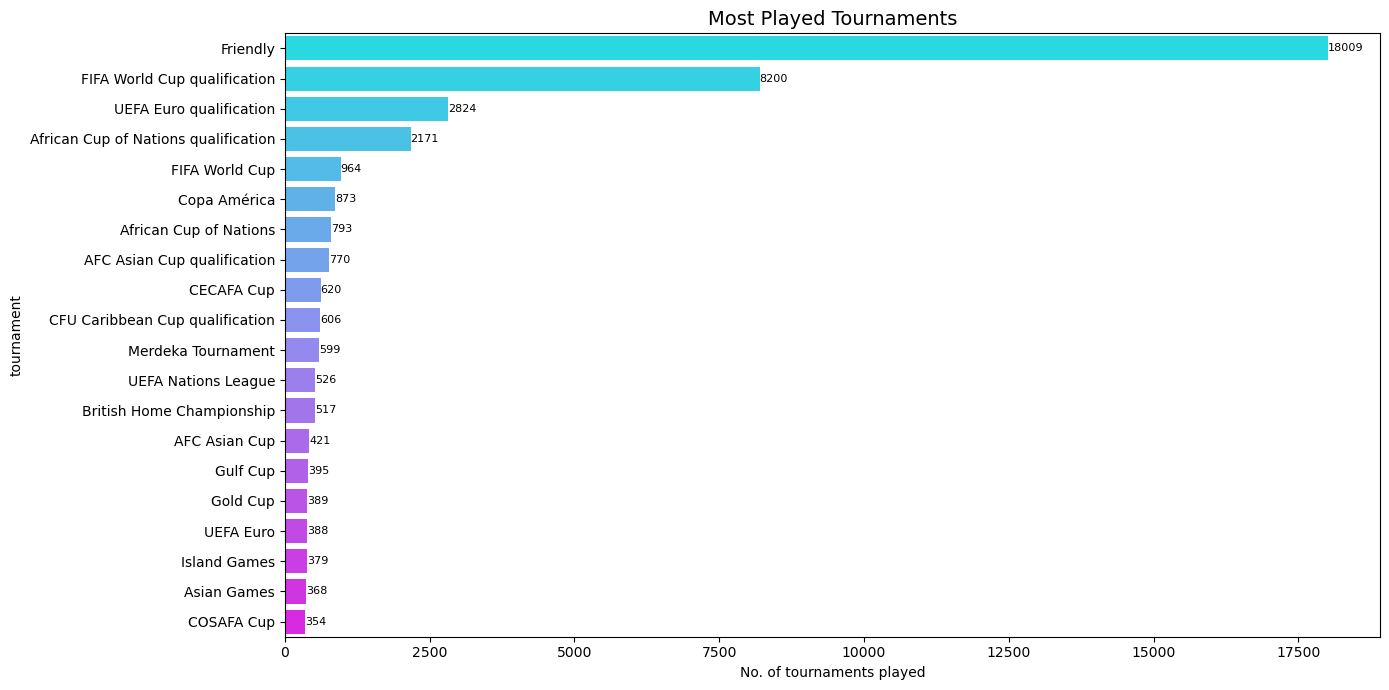

In [89]:
tournaments = result_df.tournament.value_counts(ascending=False).head(20)
plt.figure(figsize=(14, 7))
sns.barplot(x=tournaments.values, y=tournaments.index, palette='cool')

for i, v in enumerate(tournaments.values):
    plt.text(x=v+0.5, y=i, s=str(v), fontsize=8, color='black', va='center')
    
plt.title('Most Played Tournaments', size=14)
plt.xlabel('No. of tournaments played')
plt.tight_layout(pad=1.08)
plt.show()

# Is there any trend in the number of matches played over the yearesult_df?

In [90]:
result_df['year'].value_counts(ascending=False).reset_index()

,year,count
0,2019,1147
1,2021,1115
2,2011,1115
3,2008,1101
4,2004,1079
...,...,...
148,1878,2
149,1874,1
150,1873,1
151,1875,1


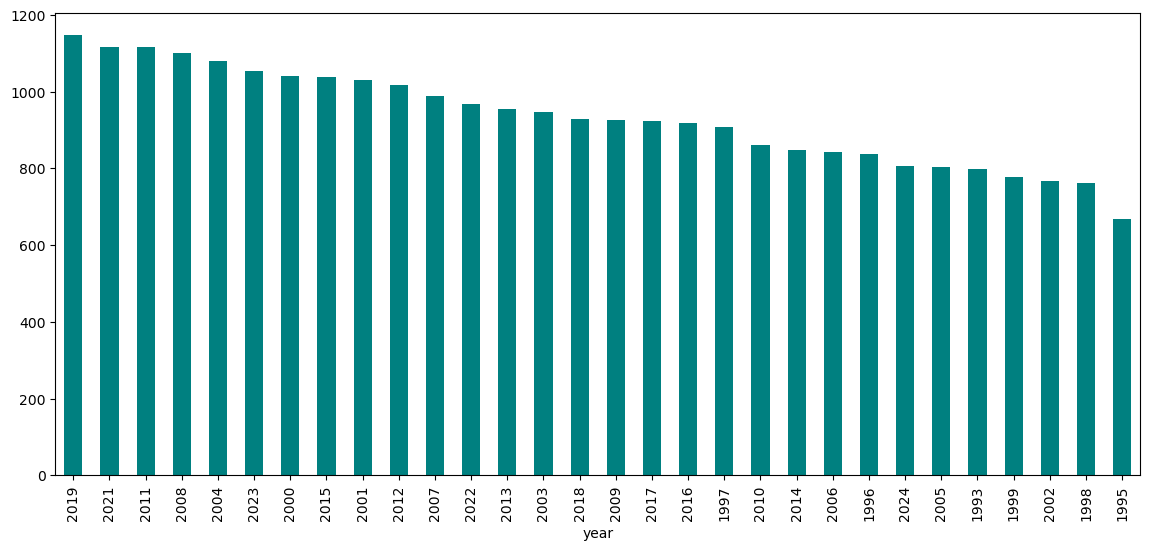

In [91]:
matches=result_df['year'].value_counts().head(30)
plt.figure(figsize=(14,6))
matches.plot(kind='bar', color='teal')

plt.show()

# Which countries have the highest number of matches recorded?

In [92]:
result_df.groupby('country')['tournament'].size().sort_values(ascending=False).reset_index()

,country,tournament
0,United States,1405
1,France,891
2,Malaysia,818
3,England,746
4,Qatar,702
...,...,...
265,Portuguese Guinea,1
266,Mali Federation,1
267,Micronesia,1
268,Bohemia and Moravia,1


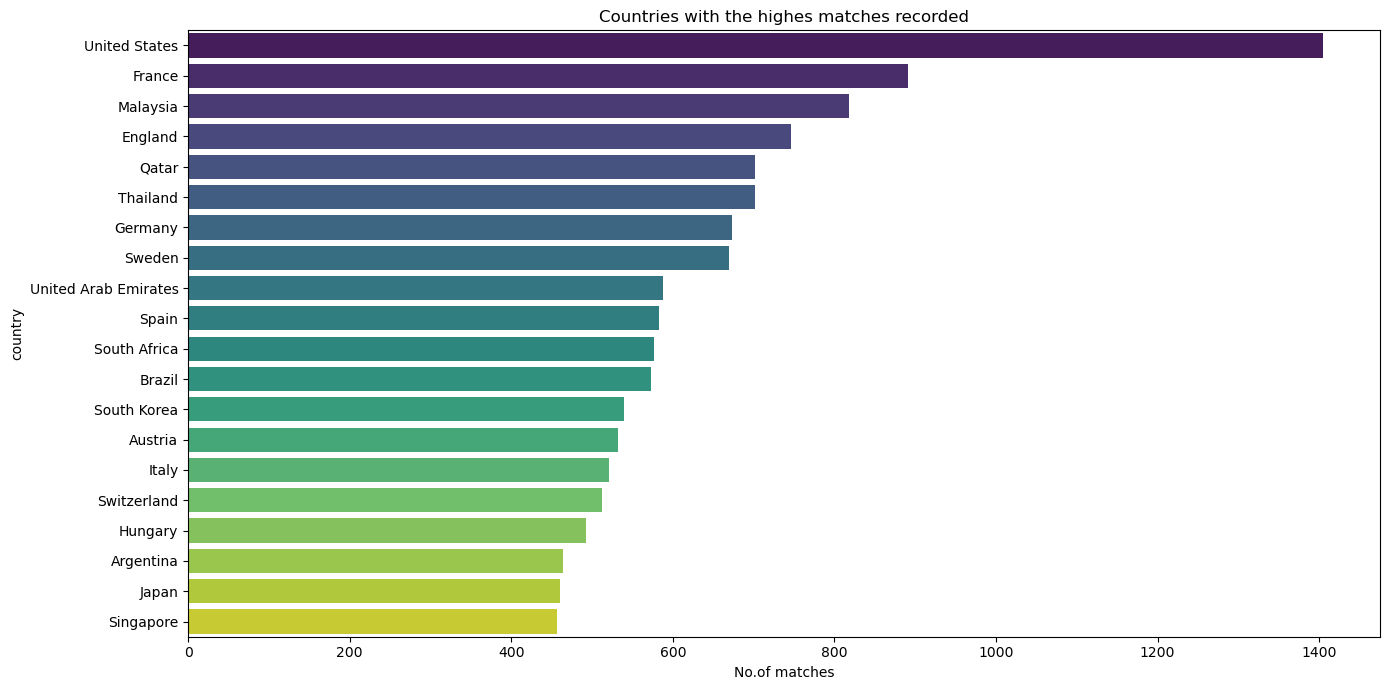

In [93]:
country = result_df.groupby('country')['tournament'].size().sort_values(ascending=False).head(20)
plt.figure(figsize=(14, 7))
sns.barplot(x=country.values, y=country.index, palette='viridis')
plt.title('Countries with the highes matches recorded')
plt.xlabel('No.of matches')
plt.tight_layout(pad=1.08)
plt.show()

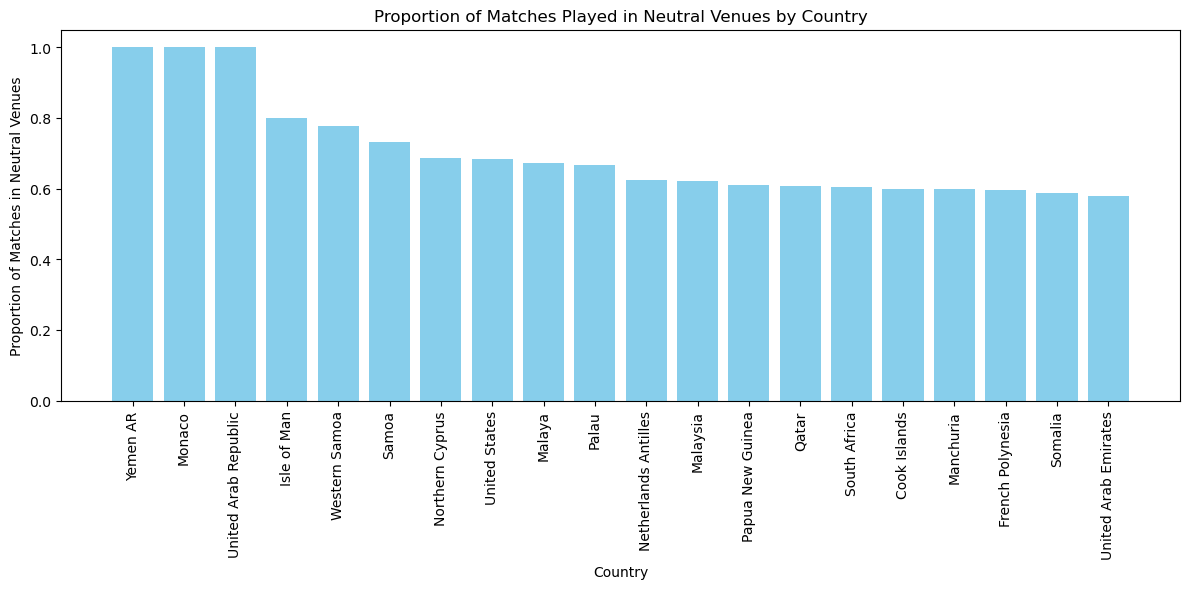

In [94]:
matches_grouped = result_df.groupby('country')['neutral'].mean().reset_index()

matches_grouped = matches_grouped[matches_grouped['neutral'] > 0]

matches_grouped = matches_grouped.sort_values(by='neutral', ascending=False).head(20)

plt.figure(figsize=(12, 6))
plt.bar(matches_grouped['country'], matches_grouped['neutral'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Proportion of Matches in Neutral Venues')
plt.title('Proportion of Matches Played in Neutral Venues by Country')
plt.xticks(rotation=90)
plt.tight_layout(pad=1.09)
plt.show()

# home_score and away_score comparision plot

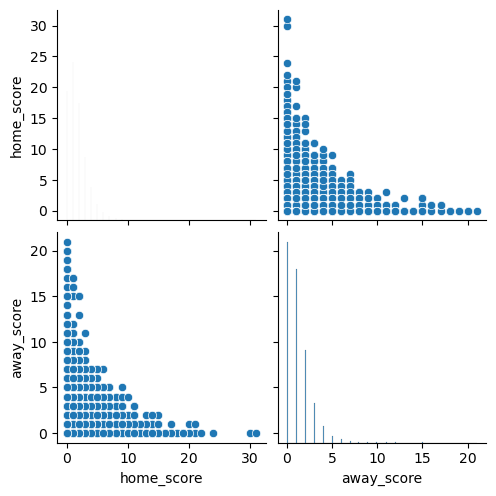

In [95]:
sns.pairplot(result_df.iloc[:,3:5])
plt.show()

In [96]:
from io import StringIO

def get_info(df):
    buf = StringIO()
    df.info(buf=buf)
    return buf.getvalue()

goal_info = get_info(goal_df)
result_info = get_info(result_df)
shootout_info = get_info(Shoot_df)

html = f"""
<div style="
  display: flex;
  align-items: center;
  justify-content: space-between;
">

  <div style="margin-bottom: 20px; width: 100%;">
    <h2 style="text-align: center;">Goalscoreresult_df Information</h2>
    <pre style="white-space: pre-wrap; background-color: #fff; padding: 10px; border-radius: 4px;">{goal_info}</pre>
  </div>

  <div style="margin-bottom: 20px; width: 100%;">
    <h2 style="text-align: center;">Results Information</h2>
    <pre style="white-space: pre-wrap; background-color: #fff; padding: 10px; border-radius: 4px;">{result_info}</pre>
  </div>

  <div style="margin-bottom: 20px; width: 100%;">
    <h2 style="text-align: center;">Shootouts Information</h2>
    <pre style="white-space: pre-wrap; background-color: #fff; padding: 10px; border-radius: 4px;">{shootout_info}</pre>
  </div>

</div>
"""

from IPython.display import display, HTML
display(HTML(html))